In [63]:
import pickle, json
import matplotlib.pyplot as plt
from openai import OpenAI

In [64]:
#open dataset and store it as a JSON object
with open('../GSM-IC/GSM-IC_mstep.json', 'r') as file:
    questions = json.load(file)
with open('../GSM-IC/GSM-IC_2step.json', 'r') as file:
    questions2 = json.load(file)
    #initialize the Groq client. This allows us to query Llama3 (or another model) from my Groq account
#todo: store the api_key in a secure way!
# client = Groq(
    # api_key=os.environ.get("GROQ_API_KEY")
    # api_key='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'
# )
client = OpenAI(api_key=open("api.txt").read())

In [65]:
all_questions = []
all_questions.extend(questions2)
all_questions.extend(questions)

In [91]:
x = []
for steps in [2, 3, 4, 5, 6]:
    x.extend([i for i in all_questions if i['n_steps'] == steps][:500])

In [67]:
y_orig = pickle.load(open("FINAL35-orig2.obj", "rb"))
y_new = pickle.load(open("FINAL35-new2.obj", "rb"))

In [68]:
def calculate_step_accs(y):
    step_accs = [[0, 0] for _ in range(10)]
    for q, a in zip(x, y):
        try:
            correct_answer = q['answer']
            llm_answer = a.split("he answer is")[1]
            step_accs[q['n_steps']][0] += int(correct_answer in llm_answer)
            step_accs[q['n_steps']][1] += 1
        except Exception as e:
            print(e)
    step_accs = [i[0] / i[1] for i in step_accs[2:7]]
    return step_accs

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


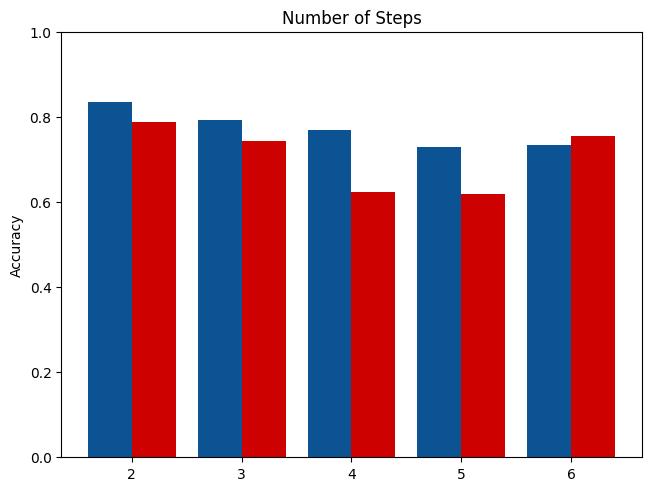

In [71]:
orig = calculate_step_accs(y_orig)
new = calculate_step_accs(y_new)
import numpy as np

steps = [2, 3, 4, 5, 6]
penguin_means = {
    'GSM8K': [i + 0.05 for i in orig],
    'GSM1C': new,
}

arr = np.array(steps)#steps#np.arange(len(steps))  # the label locations
width = 0.4  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.bar(arr + offset, measurement, width, label=attribute, color=["#0c5393", "#cc0100"][i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of Steps')
# ax.set_xticks(x + 2, steps)
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

In [76]:
# import collections
# def calculate_numb_acc(y):
#     numb_acc = collections.defaultdict(list)
#     for q, a in zip(x, y):
#         try:
#             correct_answer = q['answer']
#             llm_answer = a.split("he answer is")[1]
#             numb_acc[q['number']].append(correct_answer in llm_answer)
#         except Exception as e:
#             print(e)
#     return numb_acc

# numb_acc = calculate_numb_acc(y_new)
# numbs = [i['number'] for i in x]
# buckets = [range(0, 50), range(50, 1000), range(1000, max(map(int, numbs)))]
# import collections
# bucket_accs = collections.defaultdict(list)
# for k, v in numb_acc.items():
#     print(k)
#     b = [i for i, b in enumerate(buckets) if k in b][0]
#     bucket_accs[b].extend(v)

# plt.bar(range(len(buckets)), bucket_accs)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
8


IndexError: list index out of range

In [62]:
x[1]

{'original_question': 'A magazine costs $3 each. Jewel bought 10 magazines to be sold at $3.50 each. How much will be Jewel gain from selling these?',
 'answer': '5',
 'new_question': "A magazine costs $3 each. Jewel bought 10 magazines to be sold at $3.50 each. Jewel's neighbor bought 1000 newspapers. How much will Jewel gain from selling her magazines?",
 'n_steps': 2,
 'role': "Jewel's neighbor",
 'number': '1000',
 'sentence_template': '{role} bought {number} newspapers.',
 'role_label': 'overlapped',
 'number_label': 'out_range',
 'sentence_label': 'in_topic'}

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


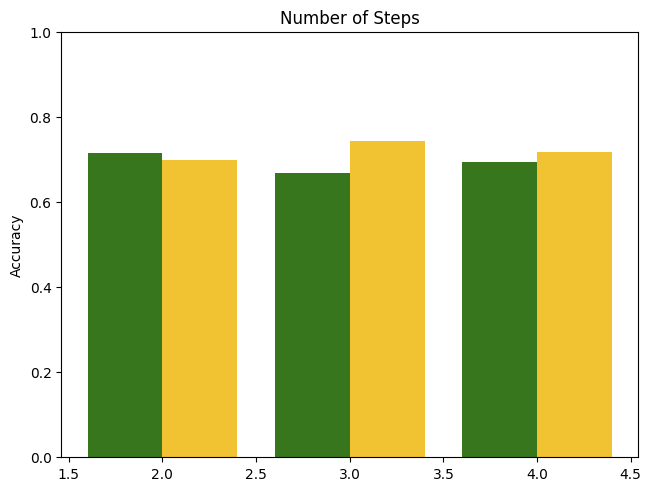

In [139]:
role_accuracy = collections.defaultdict(list)
number_accuracy = collections.defaultdict(list)
sentence_accuracy = collections.defaultdict(list)
for q, a in zip(x, y_new):
    try:
        correct_answer = q['answer']
        llm_answer = a.split("he answer is")[1]
        correct = correct_answer in llm_answer
        role_accuracy[q['role_label']].append(correct)
        number_accuracy[q['number_label']].append(correct)
        sentence_accuracy[q['sentence_label']].append(correct)
    except Exception as e:
        print(e)


from statistics import mean as m

steps = [2, 3, 4]
penguin_means = {
    'GSM8K': (m(role_accuracy['nonoverlapped']), m(number_accuracy['in_range']), m(sentence_accuracy['in_topic'])),
    'GSM1C': (m(role_accuracy['overlapped']), m(number_accuracy['out_range']), m(sentence_accuracy['out_topic'])),
}

arr = np.array(steps)#steps#np.arange(len(steps))  # the label locations
width = 0.4  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.bar(arr + offset, measurement, width, label=attribute, color=["#38761D", "#F1C231"][i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of Steps')
# ax.set_xticks(x + 2, steps)
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

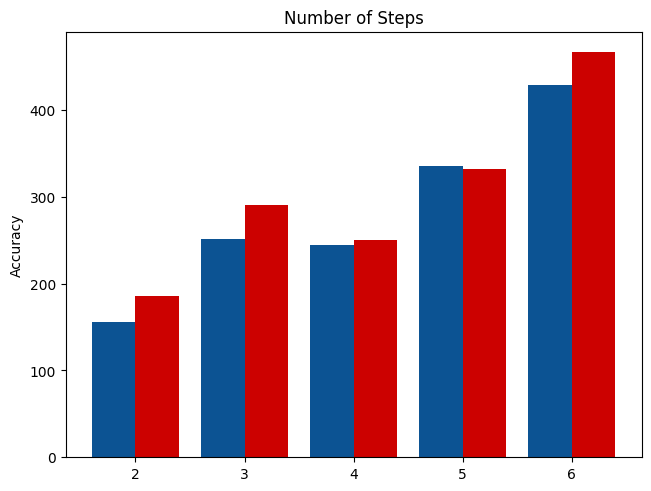

In [79]:
def calculate_length_steps(y):
    lns = collections.defaultdict(list)
    for q, a in zip(x, y):
        try:
            
            lns[q['n_steps']].append(len(a))
        except Exception as e:
            print(e)
    return lns

lns_orig = calculate_length_steps(y_orig)
lns_new = calculate_length_steps(y_new)
# orig = calculate_step_accs2(y_orig_distractor)
import numpy as np
import statistics as st

steps = [2, 3, 4, 5, 6]
penguin_means = {
    'GSM8K': [st.mean(lns_orig[i]) for i in steps],
    'GSM1C': [st.mean(lns_new[i]) for i in steps],
}

arr = np.array(steps)#steps#np.arange(len(steps))  # the label locations
width = 0.4  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.bar(arr + offset, measurement, width, label=attribute, color=["#0c5393", "#cc0100"][i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of Steps')
# ax.set_xticks(x + 2, steps)
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()


list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


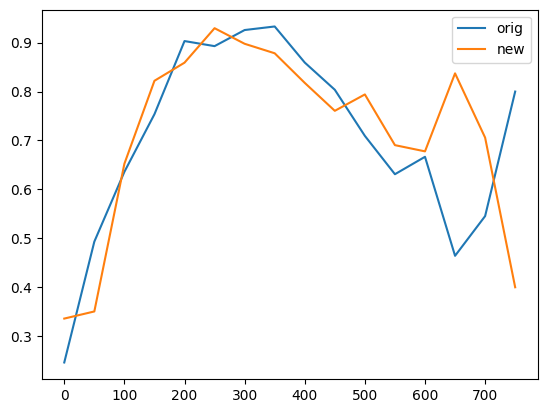

In [138]:
def calculate_length_accs(y):
    lns = collections.defaultdict(list)
    for q, a in zip(x, y):
        try:
            correct_answer = q['answer']
            llm_answer = a.split("he answer is")[1]
            correct = correct_answer in llm_answer

            lns[len(a)].append(correct)
        except Exception as e:
            print(e)
    return lns

lns_orig = calculate_length_accs(y_orig)
lns_new = calculate_length_accs(y_new)
from statistics import mean
bin_size = 50
xs = []
yo, yn = [], []
for i in range(0, 800, bin_size):
    xs.append(i)
    po = []
    pn = []
    for k in range(i, i + bin_size):
        po.extend(lns_orig[k])
        pn.extend(lns_new[k])
    if po: yo.append(mean(po))
    elif yo: yo.append(yo[-1])
    else: yo.append(0)
    if pn: yn.append(mean(pn))
    elif yn: yn.append(yn[-1])
    else: yn.append(0)

plt.plot(xs, yo, label='orig')
plt.plot(xs, yn, label='new')
plt.legend()

In [126]:
lns_orig

defaultdict(list,
            {2: [144,
              201,
              298,
              178,
              67,
              204,
              258,
              327,
              126,
              96,
              129,
              59,
              289,
              55,
              349,
              46,
              70,
              40,
              225,
              42,
              56,
              188,
              328,
              83,
              72,
              69,
              51,
              48,
              270,
              95,
              109,
              66,
              260,
              49,
              103,
              58,
              210,
              59,
              67,
              312,
              263,
              272,
              61,
              186,
              288,
              224,
              305,
              82,
              100,
              140,
              83,
              189,
              

In [100]:
import ast, json
def parse_malformed_json(s):
    lines = [i.split("\n")[0].strip(' ",') for i in s.split(":")[1:]]
    if len(lines) == 2:
        lines.append('irrelevant' in lines[1])
    else:
        lines[2] = lines[2] == 'true'
    try:
        return {'answer': lines[0], 'thoughts': lines[1], 'has_distractor': lines[2]}
    except:
        print(s)
        print(lines)

y_orig_distractor = pickle.load(open('FINAL35-orig-distractor-2.obj', 'rb'))
y_new_distractor =  pickle.load(open('FINAL35-new-distractor-2.obj', 'rb'))

In [87]:
len(y_new_distractor)

2500

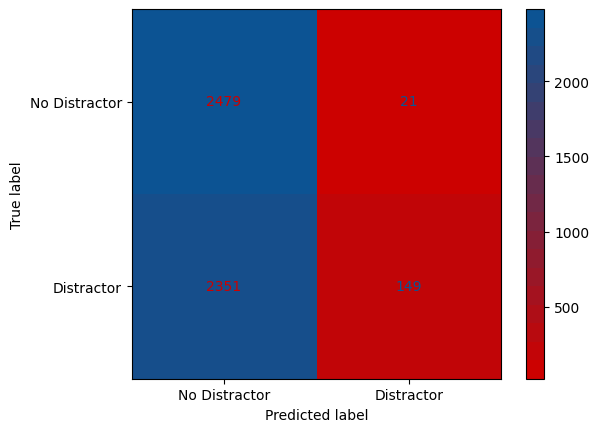

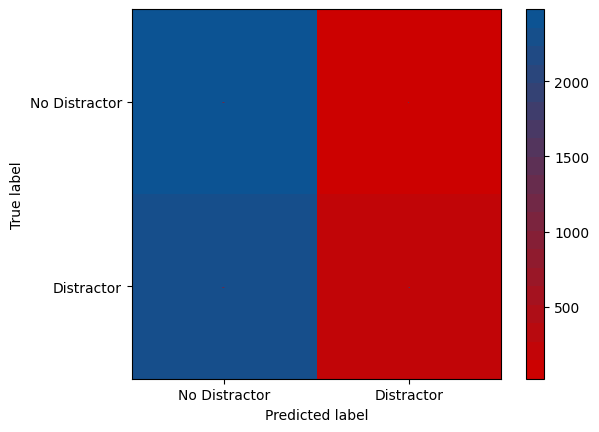

In [151]:
tp, tn, fp, fn = 0, 0, 0, 0
actual = []
predicted = []
for q, k in zip(x, y_orig_distractor):
    actual.append(False)
    predicted.append('irrelevant' in k)
for q, k in zip(x, y_new_distractor):
    actual.append(True)
    predicted.append('irrelevant' in k)
from matplotlib.colors import LinearSegmentedColormap

cm = LinearSegmentedColormap.from_list(
        "Custom", ["#cc0100", "#0c5393"], N=20)
# print(tp, tn, fp, fn, a, b)
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# confusion_matrix = metrics.confusion_matrix(actual, predicted,  colorbar=False, )

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(actual, predicted, cmap=cm, display_labels = ["No Distractor", "Distractor"]) #(confusion_matrix = confusion_matrix,display_labels = ["No Distractor", "Distractor"])
cm_display.plot(text_kw={'size': 0}, cmap=cm)
# plt.show()

In [90]:
len(actual)

2

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


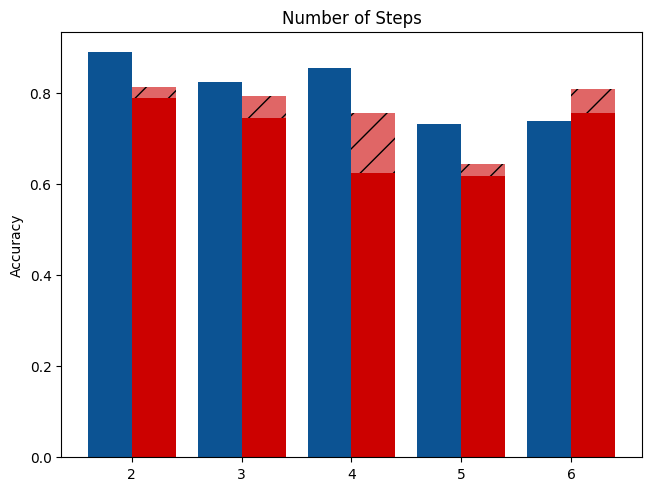

In [110]:
def calculate_step_accs_2(y):
    step_accs = [[0, 0] for _ in range(10)]
    for q, a in zip(x, y):
        try:
            correct_answer = q['answer']
            llm_answer = a.split("he answer is")[1]
            # print(correct_answer, llm_answer)
            step_accs[q['n_steps']][0] += int(correct_answer in llm_answer)
            step_accs[q['n_steps']][1] += 1
        except Exception as e:
            print(e)
            # raise e
    step_accs = [i[0] / i[1] for i in step_accs[2:7]]
    return step_accs
orig = calculate_step_accs_2(y_orig_distractor)
new = calculate_step_accs_2(y_new_distractor)
oorig = calculate_step_accs(y_orig)
onew = calculate_step_accs(y_new)
import numpy as np

steps = [2, 3, 4, 5, 6]
penguin_means = {
    'GSM8K': [i + 0.05 for i in orig],
    'GSM1C': new,
}

pms = {
    'GSM8K': [i + 0.05 for i in orig],
    'GSM1C': onew
}

arr = np.array(steps)#steps#np.arange(len(steps))  # the label locations
width = 0.4  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.bar(arr + offset, measurement, width, label=attribute, color=["#6fa7db", "#e06666"][i], hatch='/')
    rects = ax.bar(arr + offset, pms[attribute], width, label=attribute, color=["#0c5393", "#cc0100"][i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of Steps')
# ax.set_xticks(x + 2, steps)
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()
